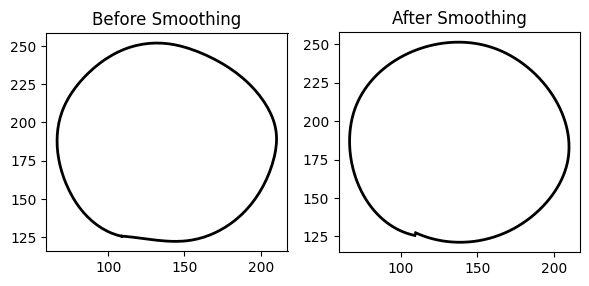

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from rdp import rdp
from scipy.interpolate import splprep, splev

def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def flatten_paths(paths_XYs):
    all_points = []
    for XYs in paths_XYs:
        for XY in XYs:
            all_points.extend(XY)
    return np.array(all_points)

def cluster_polylines(paths_XYs):
    clusters = []
    for XYs in paths_XYs:
        cluster_points = flatten_paths([XYs])
        clusters.append(cluster_points)
    return clusters

def simplify_paths(paths_XYs, epsilon):
    simplified_paths = []
    for XYs in paths_XYs:
        simplified_XYs = []
        for XY in XYs:
            simplified_XY = rdp(XY, epsilon=epsilon)
            simplified_XYs.append(simplified_XY)
        simplified_paths.append(simplified_XYs)
    return simplified_paths

def smooth_curve(XY, smooth_factor=0.1):
    if len(XY) > 3:  # Ensure there are enough points to create a spline
        tck, u = splprep(XY.T, s=smooth_factor)
        new_points = splev(np.linspace(0, 1, len(XY) * 10), tck)
        return np.vstack(new_points).T
    else:
        return XY  # Return the original points if not enough points to smooth

def smooth_paths(paths_XYs, smooth_factor):
    smoothed_paths = []
    for XYs in paths_XYs:
        smoothed_XYs = []
        for XY in XYs:
            smoothed_XY = smooth_curve(XY, smooth_factor)
            smoothed_XYs.append(smoothed_XY)
        smoothed_paths.append(smoothed_XYs)
    return smoothed_paths

def plot_shapes_comparison(original_paths, smoothed_paths):
    fig, axes = plt.subplots(1, 2, tight_layout=True, figsize=(6, 3))
    colours = ['k']
    
    # Plot original paths
    for i, XYs in enumerate(original_paths):
        c = colours[i % len(colours)]
        for XY in XYs:
            axes[0].plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
    axes[0].set_title('Before Smoothing')
    axes[0].set_aspect('equal')
    
    # Plot smoothed paths
    for i, XYs in enumerate(smoothed_paths):
        c = colours[i % len(colours)]
        for XY in XYs:
            axes[1].plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
    axes[1].set_title('After Smoothing')
    axes[1].set_aspect('equal')
    
    plt.show()

# Load the CSV data
csv_path = 'data/file1.csv'
path_XYs = read_csv(csv_path)

# Simplify the polylines using the RDP algorithm
epsilon = 0.05  # You can adjust the epsilon value as needed
simplified_paths = simplify_paths(path_XYs, epsilon)

# Smooth the simplified polylines using B-spline smoothing
smooth_factor = 95.1  # You can adjust the smooth factor as needed
smoothed_paths = smooth_paths(simplified_paths, smooth_factor)

# Plot the paths before and after smoothing
plot_shapes_comparison(simplified_paths, smoothed_paths)


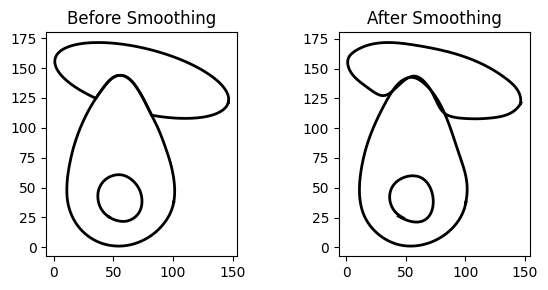

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from rdp import rdp
from scipy.interpolate import splprep, splev

def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def flatten_paths(paths_XYs):
    all_points = []
    for XYs in paths_XYs:
        for XY in XYs:
            all_points.extend(XY)
    return np.array(all_points)

def cluster_polylines(paths_XYs):
    clusters = []
    for XYs in paths_XYs:
        cluster_points = flatten_paths([XYs])
        clusters.append(cluster_points)
    return clusters

def simplify_paths(paths_XYs, epsilon):
    simplified_paths = []
    for XYs in paths_XYs:
        simplified_XYs = []
        for XY in XYs:
            simplified_XY = rdp(XY, epsilon=epsilon)
            simplified_XYs.append(simplified_XY)
        simplified_paths.append(simplified_XYs)
    return simplified_paths

def smooth_curve(XY, smooth_factor=0.1):
    if len(XY) > 3:  # Ensure there are enough points to create a spline
        tck, u = splprep(XY.T, s=smooth_factor)
        new_points = splev(np.linspace(0, 1, len(XY) * 10), tck)
        return np.vstack(new_points).T
    else:
        return XY  # Return the original points if not enough points to smooth

def smooth_paths(paths_XYs, smooth_factor):
    smoothed_paths = []
    for XYs in paths_XYs:
        smoothed_XYs = []
        for XY in XYs:
            smoothed_XY = smooth_curve(XY, smooth_factor)
            smoothed_XYs.append(smoothed_XY)
        smoothed_paths.append(smoothed_XYs)
    return smoothed_paths

def plot_shapes_comparison(original_paths, smoothed_paths):
    fig, axes = plt.subplots(1, 2, tight_layout=True, figsize=(6, 3))
    colours = ['k']
    
    # Plot original paths
    for i, XYs in enumerate(original_paths):
        c = colours[i % len(colours)]
        for XY in XYs:
            axes[0].plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
    axes[0].set_title('Before Smoothing')
    axes[0].set_aspect('equal')
    
    # Plot smoothed paths
    for i, XYs in enumerate(smoothed_paths):
        c = colours[i % len(colours)]
        for XY in XYs:
            axes[1].plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
    axes[1].set_title('After Smoothing')
    axes[1].set_aspect('equal')
    
    plt.show()

# Load the CSV data
csv_path = 'data/occlusion1.csv'
path_XYs = read_csv(csv_path)

# Simplify the polylines using the RDP algorithm
epsilon = 0.005  # You can adjust the epsilon value as needed
simplified_paths = simplify_paths(path_XYs, epsilon)

# Smooth the simplified polylines using B-spline smoothing
smooth_factor = 95.1  # You can adjust the smooth factor as needed
smoothed_paths = smooth_paths(simplified_paths, smooth_factor)

# Plot the paths before and after smoothing
plot_shapes_comparison(simplified_paths, smoothed_paths)
